<a href="https://colab.research.google.com/github/DajanaSanchez/BirdMigrationClimateAnalysis/blob/main/correlation_analysis_bird_migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd '/content/drive/MyDrive/Colab Notebooks'

%ls -ltra *fina*


/content/drive/MyDrive/Colab Notebooks
-rw------- 1 root root 376698293 Mar 10 01:57 final_merged_dataset.csv
-rw------- 1 root root  56210779 Mar 19 00:54 final_merged_dataset-2.parquet


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_parquet('final_merged_dataset-2.parquet')

# Display the first 10 rows
print("Column Names:", df.columns.tolist())  # Show column names for reference
df.head(10)  # Show the first 10 records


Column Names: ['Latitude', 'Longitude', 'Observation_Date', 'Year', 'Region', 'Land_Cover_Description', 'Has_Habitat_Change', 'Temp_celsius', 'Precip_mm', 'Month']


,Latitude,Longitude,Observation_Date,Year,Region,Land_Cover_Description,Has_Habitat_Change,Temp_celsius,Precip_mm,Month
0,19.343703,-96.464161,2017-10-01,2017,Mexico,Cropland/Natural Vegetation Mosaic,False,27.00,234.0,10
1,19.343703,-96.464161,2017-10-01,2017,Mexico,Cropland/Natural Vegetation Mosaic,False,27.00,234.0,10
2,19.343703,-96.464161,2017-10-01,2017,Mexico,Cropland/Natural Vegetation Mosaic,False,27.00,234.0,10
3,19.343703,-96.464161,2017-10-01,2017,Mexico,Cropland/Natural Vegetation Mosaic,False,27.00,234.0,10
4,19.343703,-96.464161,2017-10-01,2017,Mexico,Cropland/Natural Vegetation Mosaic,False,27.00,234.0,10
5,19.370375,-96.377616,2008-10-01,2008,Mexico,Croplands,False,26.25,205.1,10
6,19.370375,-96.377616,2018-11-01,2018,Mexico,Croplands,False,24.70,7.0,11
7,19.370375,-96.377616,2018-11-01,2018,Mexico,Croplands,False,24.70,7.0,11
8,19.370375,-96.377616,2018-11-01,2018,Mexico,Croplands,False,24.70,7.0,11
9,19.704123,-99.086638,2016-01-01,2016,Mexico,Grasslands,False,14.10,21.0,1


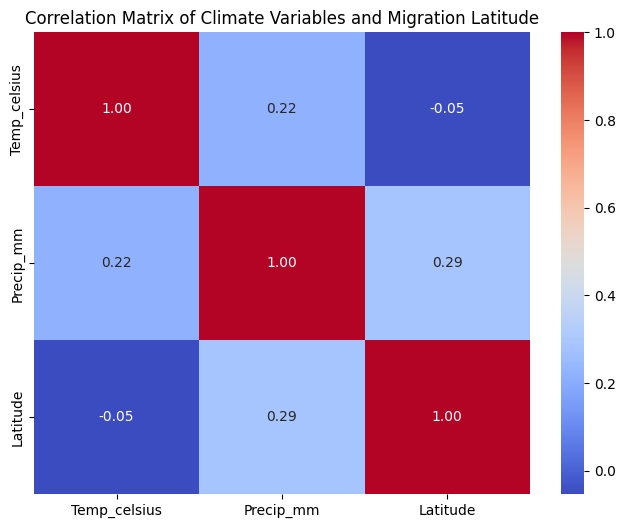

Pearson Correlation (Temp vs. Latitude): PearsonRResult(statistic=np.float64(-0.053732679926155914), pvalue=np.float64(2.488374e-316))
Pearson Correlation (Precip vs. Latitude): PearsonRResult(statistic=np.float64(0.28782141297597796), pvalue=np.float64(0.0))
                            OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                 2.694e+04
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:59:00   Log-Likelihood:            -8.5370e+05
No. Observations:              500000   AIC:                         1.707e+06
Df Residuals:                  499997   BIC:                         1.707e+06
Df Model:                           2                                         
Covariance Type:            n

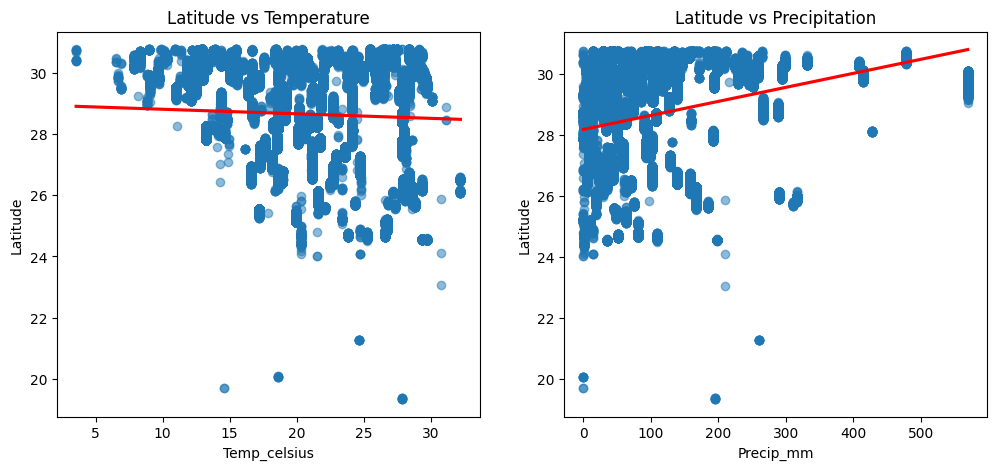

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Load the dataset
file_path = "final_merged_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Limit to first 10,000 records for debugging
df = df.head(500000)

# Convert Date to datetime format and extract Year and Month for analysis
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Define migration timing proxy (e.g., latitude changes over time)
df.sort_values(by=['Year', 'Month'], inplace=True)

# Compute Pearson Correlation
correlation_results = df[['Temp_celsius', 'Precip_mm', 'Latitude']].corr(method='pearson')

# Visualizing correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Climate Variables and Migration Latitude')
plt.show()

# Performing Pearson Correlation Tests
pearson_temp_lat = stats.pearsonr(df['Temp_celsius'], df['Latitude'])
pearson_precip_lat = stats.pearsonr(df['Precip_mm'], df['Latitude'])

print(f"Pearson Correlation (Temp vs. Latitude): {pearson_temp_lat}")
print(f"Pearson Correlation (Precip vs. Latitude): {pearson_precip_lat}")

# Regression Analysis: Predicting Latitude based on Climate Variables
X = df[['Temp_celsius', 'Precip_mm']]
X = sm.add_constant(X)  # Adding constant for intercept
y = df['Latitude']

model = sm.OLS(y, X).fit()
print(model.summary())

# Scatter plots with regression line
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x=df['Temp_celsius'], y=df['Latitude'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Latitude vs Temperature')

plt.subplot(1, 2, 2)
sns.regplot(x=df['Precip_mm'], y=df['Latitude'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Latitude vs Precipitation')

plt.show()


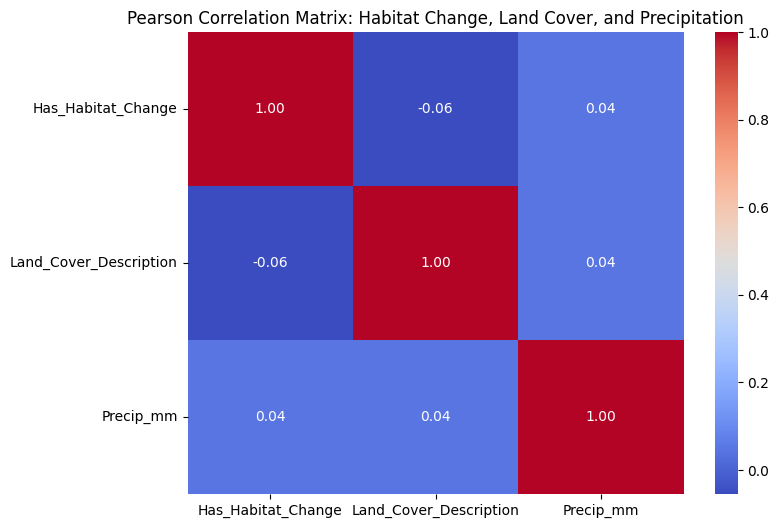

Pearson Correlation (Habitat Change vs Precipitation): PearsonRResult(statistic=np.float64(0.04411635600322767), pvalue=np.float64(7.773874296129038e-214))
Pearson Correlation (Land Cover vs Precipitation): PearsonRResult(statistic=np.float64(0.04379397886069937), pvalue=np.float64(9.479108020133376e-211))
                            OLS Regression Results                            
Dep. Variable:              Precip_mm   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1027.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:31:19   Log-Likelihood:            -2.7863e+06
No. Observations:              500000   AIC:                         5.573e+06
Df Residuals:                  499997   BIC:                         5.573e+06
Df Model:                           2                       

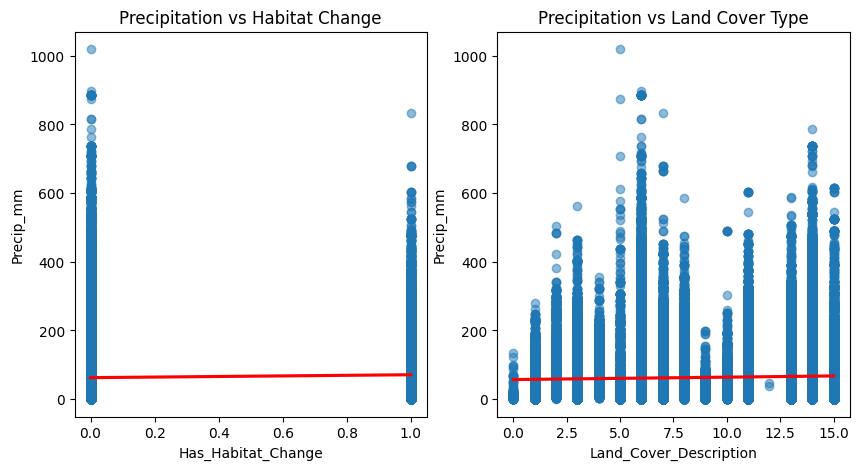

In [17]:
# Install necessary Parquet engine if missing
!pip install pyarrow --quiet

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Load the dataset from the given Parquet file
df = pd.read_parquet('final_merged_dataset-2.parquet', engine='pyarrow')  # Specify engine
df = pd.read_parquet('final_merged_dataset-2.parquet', engine='pyarrow').head(500000)


# Convert Observation_Date to datetime format
df['Observation_Date'] = pd.to_datetime(df['Observation_Date'])

# Convert categorical variables to numerical representations
df["Has_Habitat_Change"] = df["Has_Habitat_Change"].astype(int)  # Convert True/False to 0/1
df["Land_Cover_Description"] = df["Land_Cover_Description"].astype("category").cat.codes  # Convert categorical to numerical

# Compute Pearson Correlation (removing Latitude)
correlation_results = df[["Has_Habitat_Change", "Land_Cover_Description", "Precip_mm"]].corr(method="pearson")

# Visualizing correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_results, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Matrix: Habitat Change, Land Cover, and Precipitation")
plt.show()

# Performing Pearson Correlation Tests
pearson_habitat_precip = stats.pearsonr(df['Has_Habitat_Change'], df['Precip_mm'])
pearson_land_precip = stats.pearsonr(df['Land_Cover_Description'], df['Precip_mm'])

print(f"Pearson Correlation (Habitat Change vs Precipitation): {pearson_habitat_precip}")
print(f"Pearson Correlation (Land Cover vs Precipitation): {pearson_land_precip}")

# Regression Analysis: Predicting Precip_mm based on Has_Habitat_Change and Land_Cover_Description
X = df[["Has_Habitat_Change", "Land_Cover_Description"]]
X = sm.add_constant(X)  # Adding constant for intercept
y = df["Precip_mm"]

# Drop missing values before running regression
X = X.dropna()
y = y.loc[X.index]

model = sm.OLS(y, X).fit()
print(model.summary())

# Scatter plots with regression lines
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.regplot(x=df["Has_Habitat_Change"], y=df["Precip_mm"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Precipitation vs Habitat Change")

plt.subplot(1, 2, 2)
sns.regplot(x=df["Land_Cover_Description"], y=df["Precip_mm"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Precipitation vs Land Cover Type")

plt.show()

